# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Read dataset from initial data and show 5 first rows data.
df = pd.read_csv('/content/bank_transactions_data_init.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


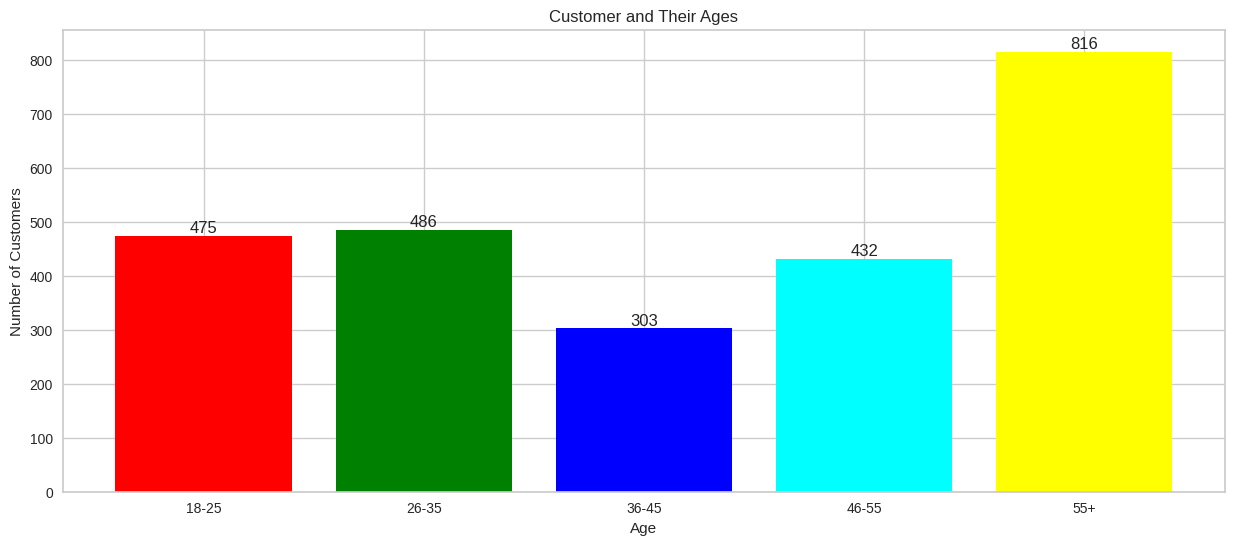

In [6]:
# Grouping customer age using binning
age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[df.CustomerAge >= 56]

# Set data for plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Create bar chart for age distribution
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Add label
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

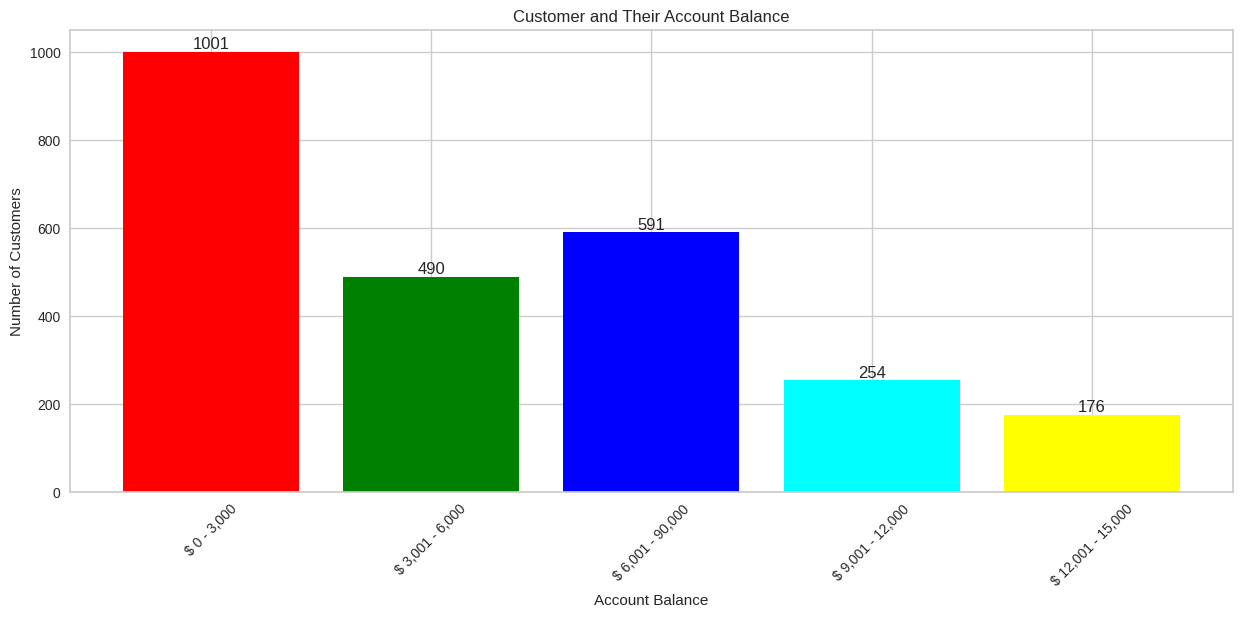

In [7]:
# Grouping customer account balance
ai0_3000 = df['AccountBalance'][(df["AccountBalance"] >= 0) & (df["AccountBalance"] <= 3000)]
ai3001_6000 = df["AccountBalance"][(df["AccountBalance"] >= 3001) & (df["AccountBalance"] <= 6000)]
ai6001_9000 = df["AccountBalance"][(df["AccountBalance"] >= 6001) & (df["AccountBalance"] <= 9000)]
ai9001_12000 = df["AccountBalance"][(df["AccountBalance"] >= 9001) & (df["AccountBalance"] <= 12000)]
ai12001_15000 = df["AccountBalance"][(df["AccountBalance"] >= 12001) & (df["AccountBalance"] <= 15000)]

# Setting data for plotting
aix = ["$ 0 - 3,000", "$ 3,001 - 6,000", "$ 6,001 - 90,000", "$ 9,001 - 12,000", "$ 12,001 - 15,000"]
aiy = [len(ai0_3000.values), len(ai3001_6000.values), len(ai6001_9000.values), len(ai9001_12000.values), len(ai12001_15000.values)]

# Create bar chart for distribution account balance
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Rotate x for easy to read

# Add label total customer
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

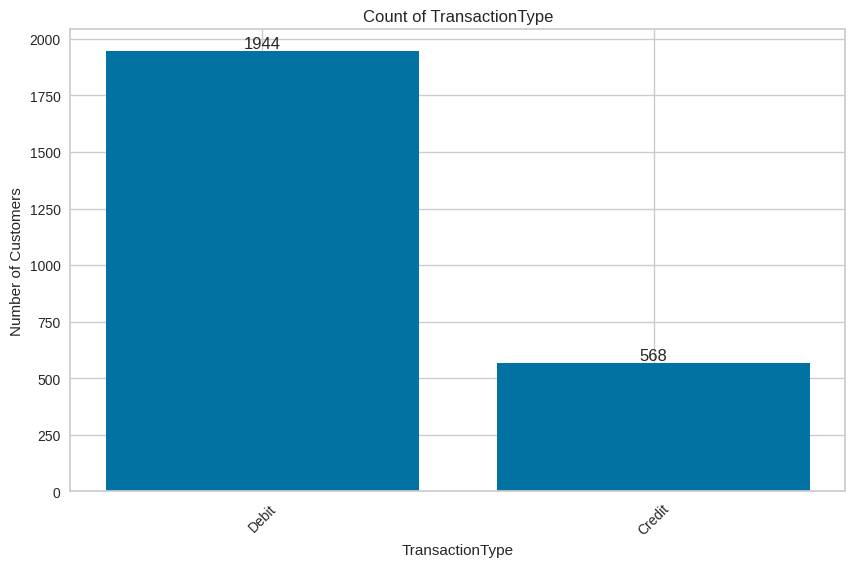

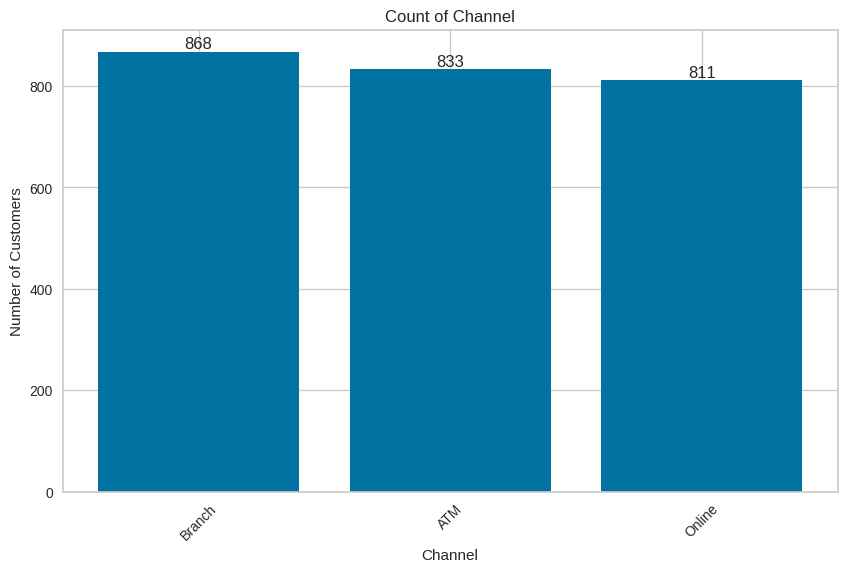

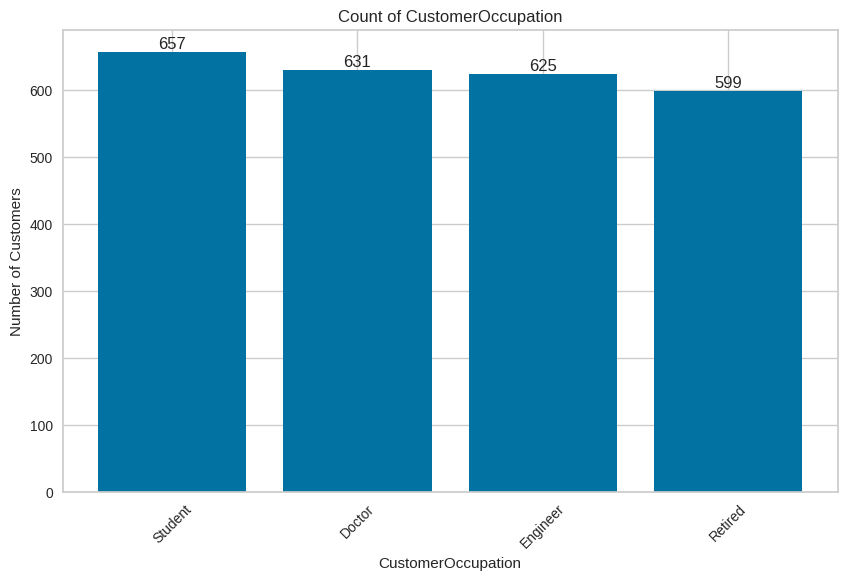

In [8]:
# Grouping customer based on categorical variable
categorical_vars = ['TransactionType', 'Channel', 'CustomerOccupation']

for var in categorical_vars:
    counts = df[var].value_counts()
    categories = counts.index.tolist()
    number_of_customers = counts.values.tolist()

    # Create figure for bar chart
    plt.figure(figsize=(10, 6))

    # Plot bar chart
    plt.bar(categories, number_of_customers)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)

    # Show value in top of bar chart
    for i, freq in enumerate(number_of_customers):
        plt.text(i, freq, str(freq), ha='center', va='bottom')

    plt.show()


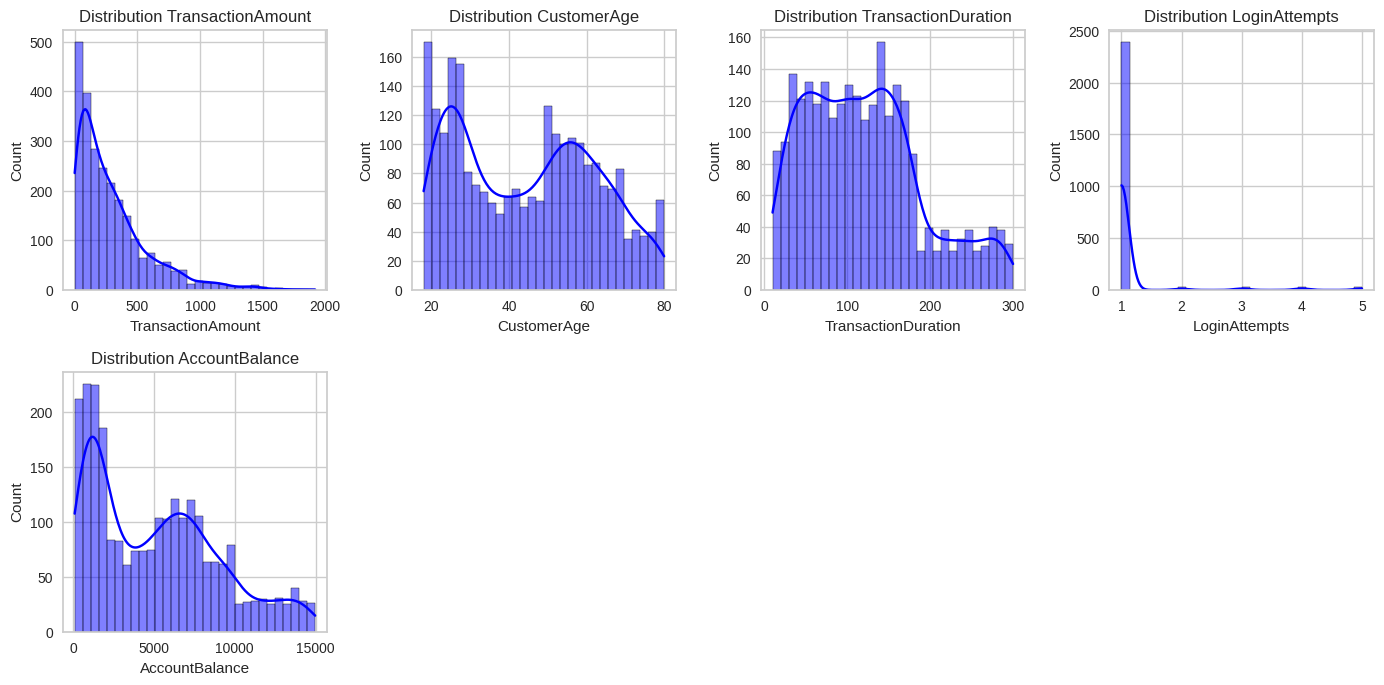

In [9]:
# Distribution for numerical features
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

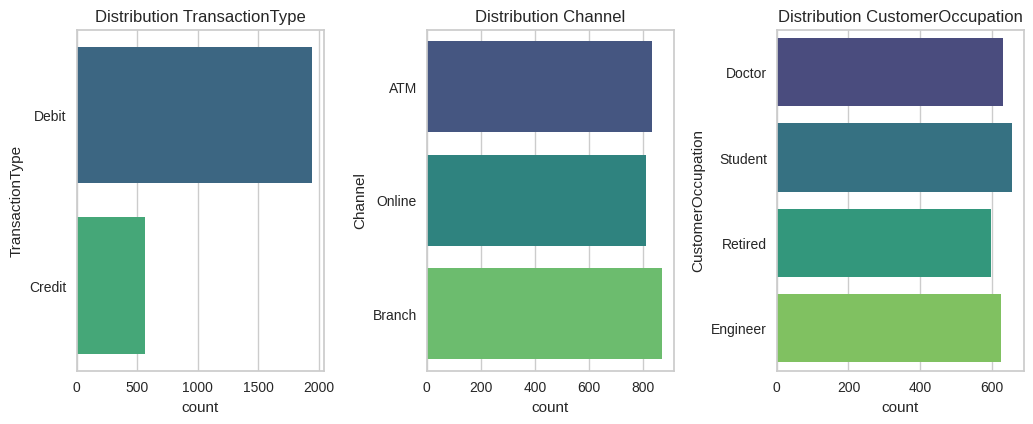

In [10]:
# Selected distribution from categorical features
plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], hue=df[column], palette='viridis', legend=False)
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

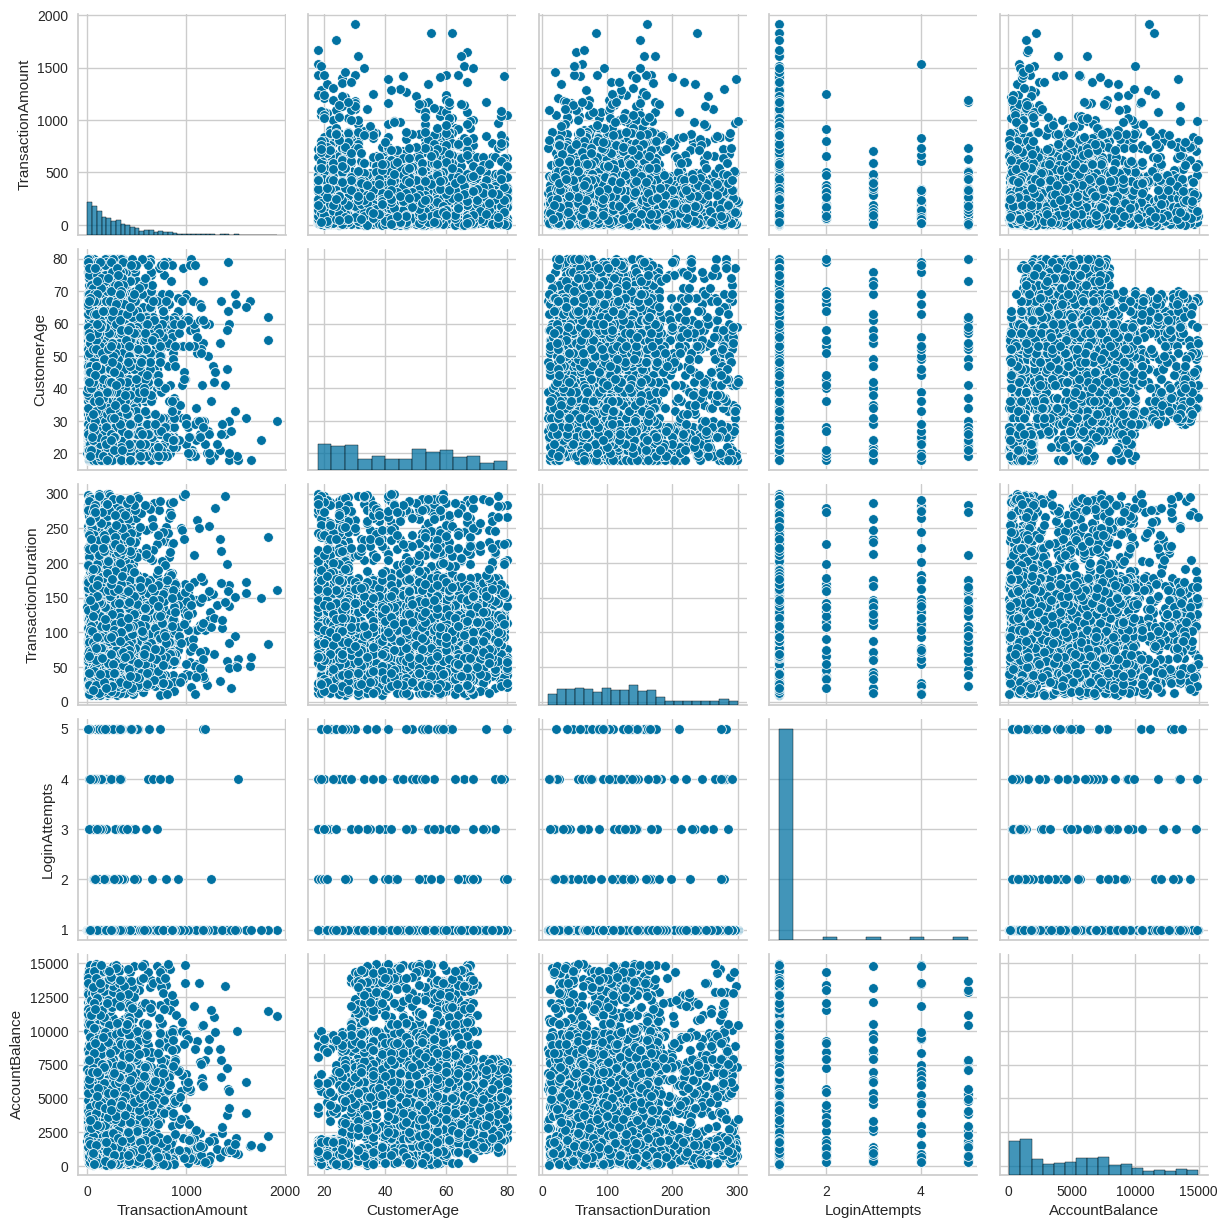

In [11]:
# Pairplot for numerical features
sns.pairplot(num_features)
plt.show()

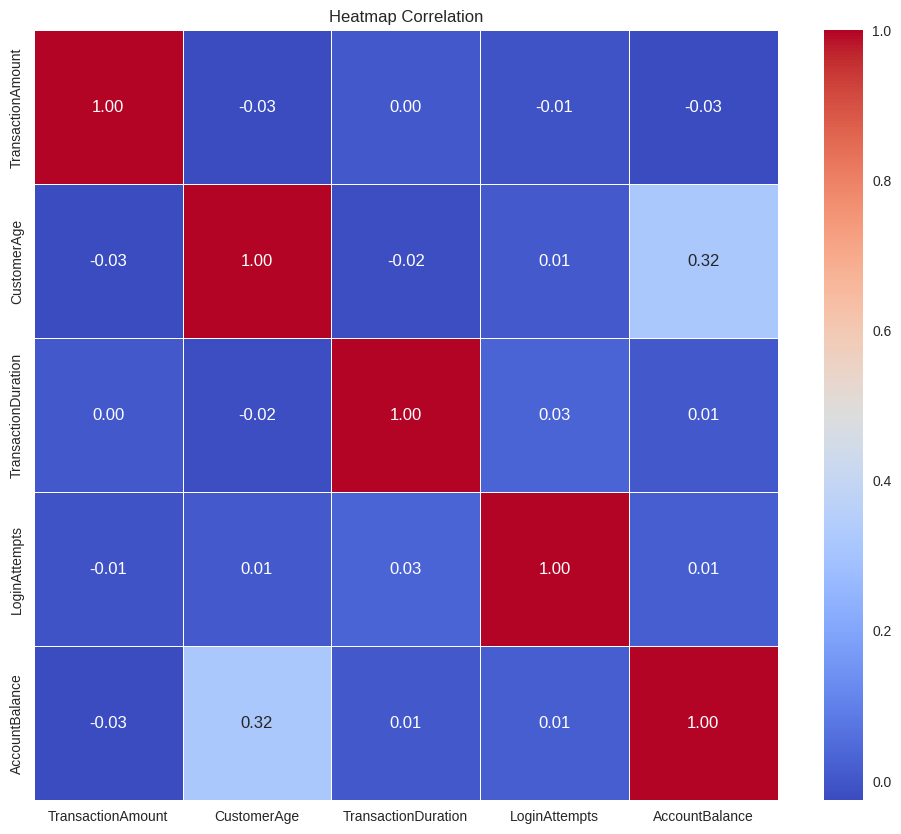

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
# Copy df for preprocessing
df_preprocessed = df.copy()
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [14]:
# Check for duplicates
duplicates = df_preprocessed.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for missing values
missing_values = df_preprocessed.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Number of duplicate rows: 0
Missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [15]:
# Convert from object to date time
needed_to_convert = ['TransactionDate', 'PreviousTransactionDate']
for col in needed_to_convert:
    df_preprocessed[col] = pd.to_datetime(df_preprocessed[col])

df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [16]:
#  Drop unused columns
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'LoginAttempts']
df_preprocessed.drop(columns=columns_to_drop, inplace=True)
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   AccountBalance           2512 non-null   float64       
 9   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 196.4+ KB


In [17]:
# Add column days between last transaction
df_preprocessed["DaysBetweenTransaction"] = (df_preprocessed["PreviousTransactionDate"] - df_preprocessed["TransactionDate"]).dt.days

df_preprocessed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,DaysBetweenTransaction
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,5112.21,2024-11-04 08:08:08,572
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,13758.91,2024-11-04 08:09:35,495
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1122.35,2024-11-04 08:07:04,482
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,8569.06,2024-11-04 08:09:06,548
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,7429.40,2024-11-04 08:06:39,384


In [18]:
# Get all numeric features
numeric_features = df_preprocessed.select_dtypes(include=['number']).columns
print(numeric_features)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'DaysBetweenTransaction'],
      dtype='object')


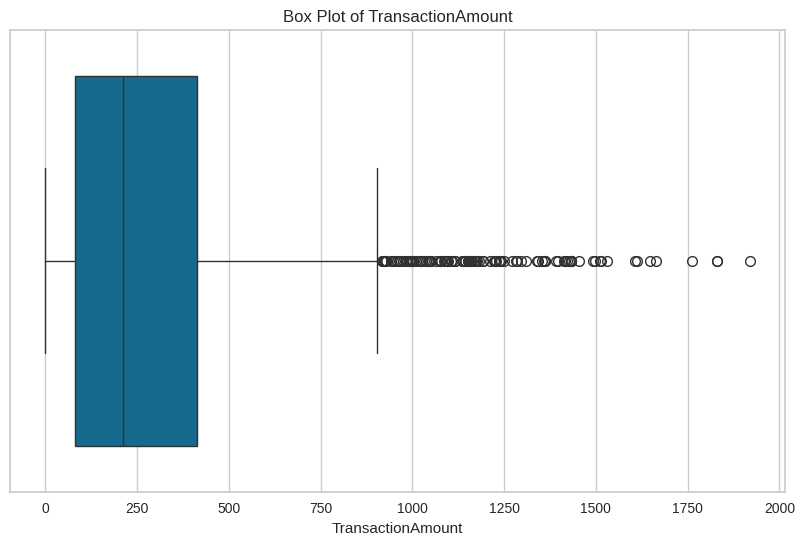

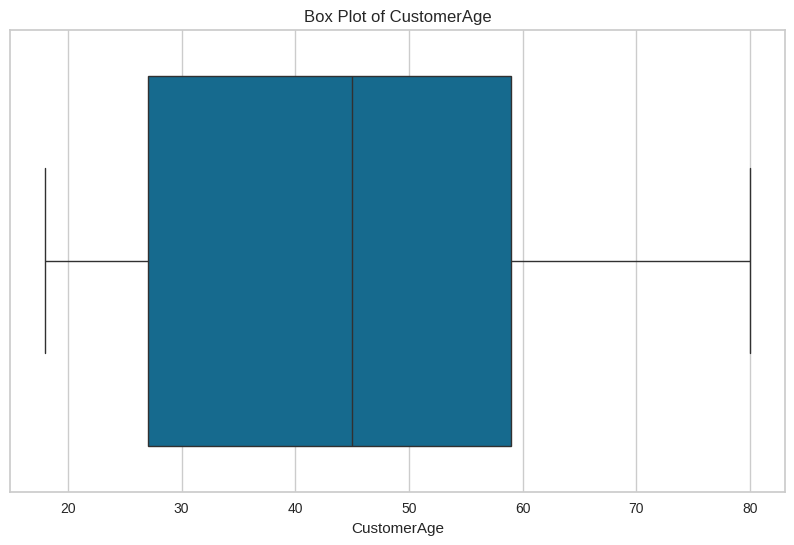

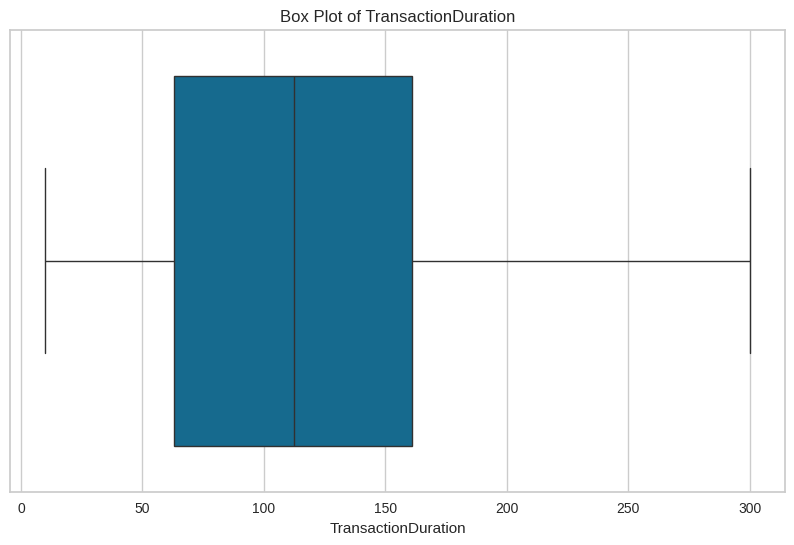

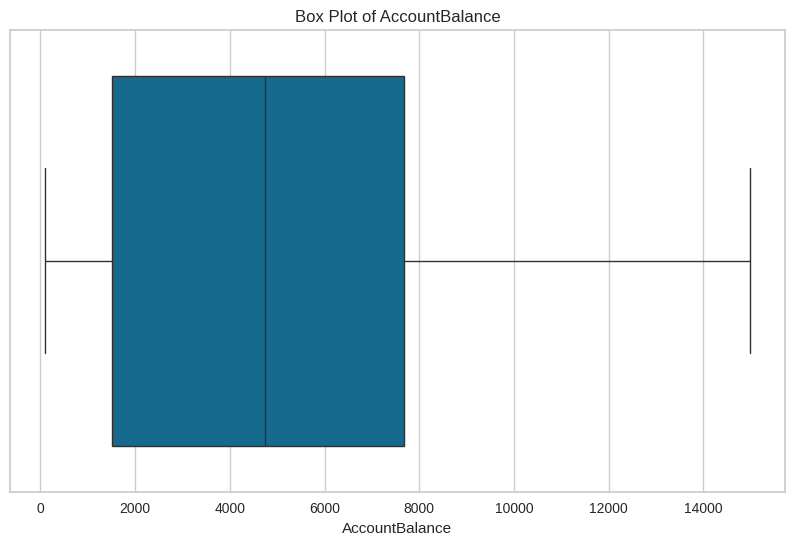

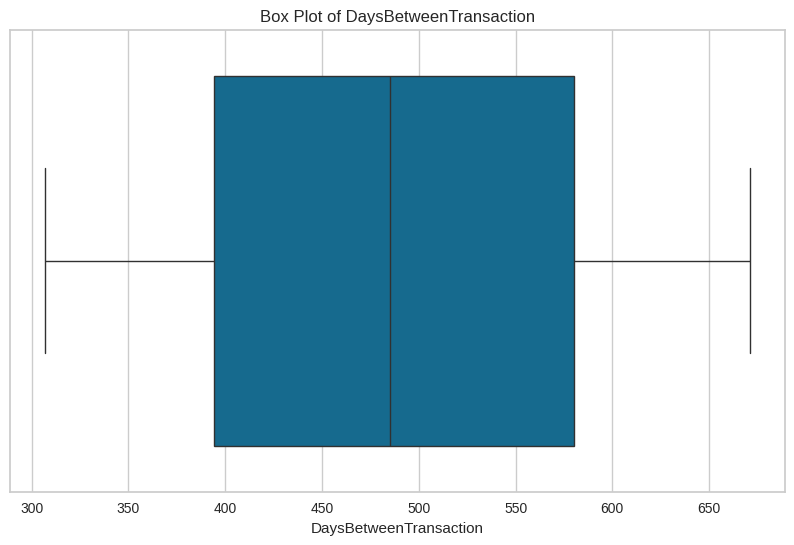

In [19]:
# Make plot for detection outliers
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [20]:
# Handle outliers
for feature in numeric_features:
    Q1 = df_preprocessed[feature].quantile(0.25)
    Q3 = df_preprocessed[feature].quantile(0.75)
    IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR

    if feature not in ['TransactionAmount', 'AccountBalance']: # Let Outliers in TransactionAmount and AccountBalance
        # Filter dataframe
        condition = ~((df_preprocessed[numeric_features] < (Q1 - 1.5 * IQR)) | (df_preprocessed[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
        df_preprocessed_filtered_numeric = df_preprocessed.loc[condition, numeric_features]
    # else:
    #     df_preprocessed[feature] = df[feature].apply(lambda x: (Q1 - 1.5 * IQR) if x < lower_bound else (Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

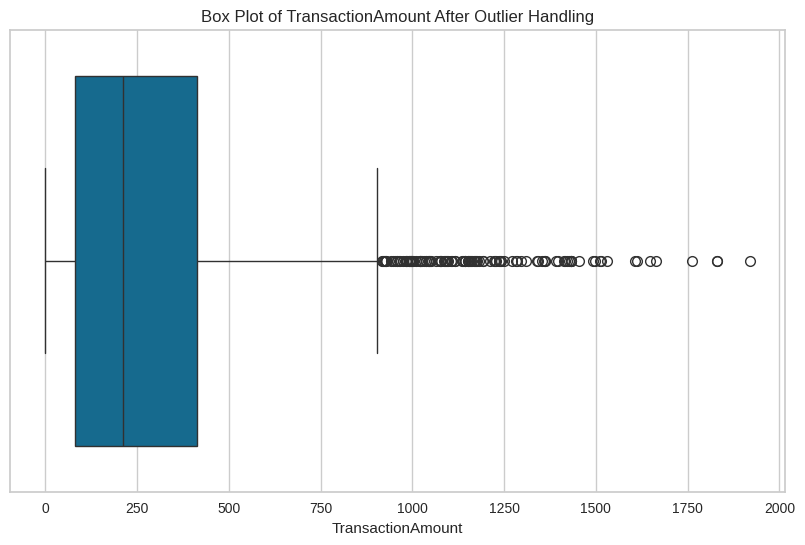

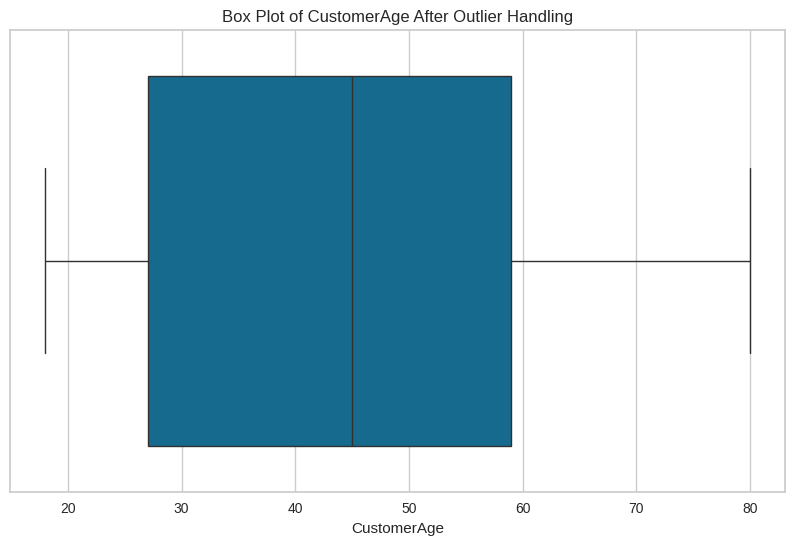

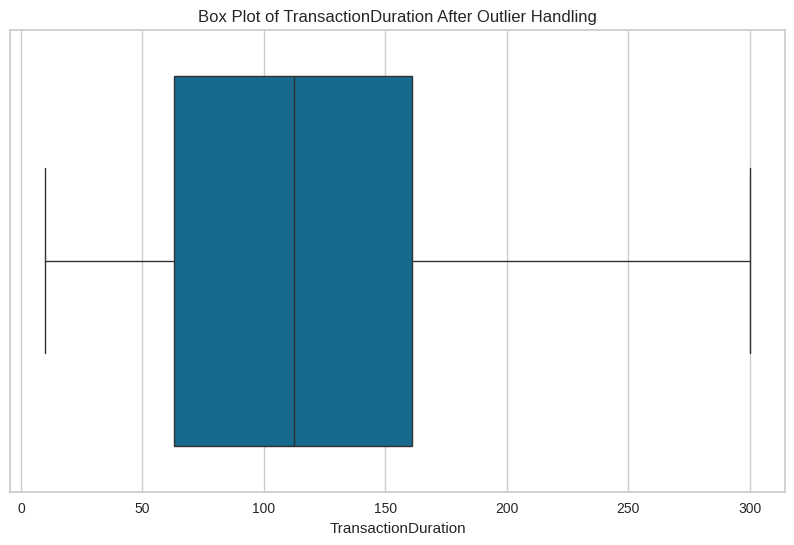

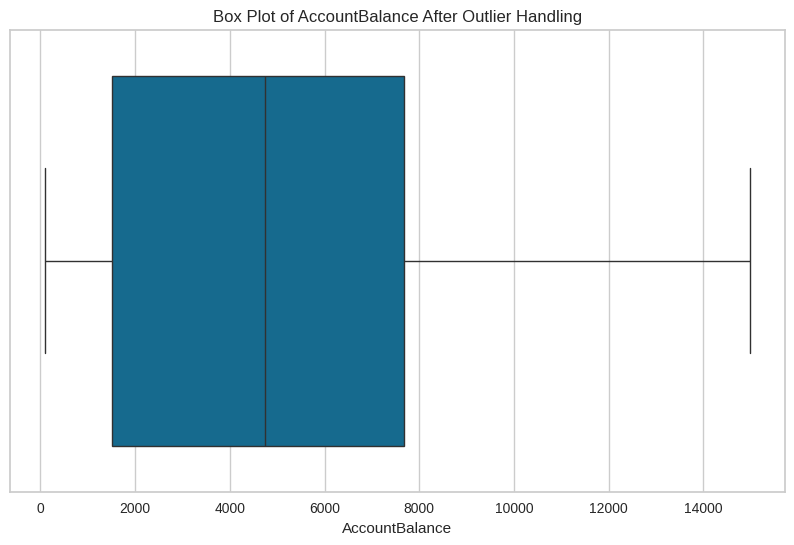

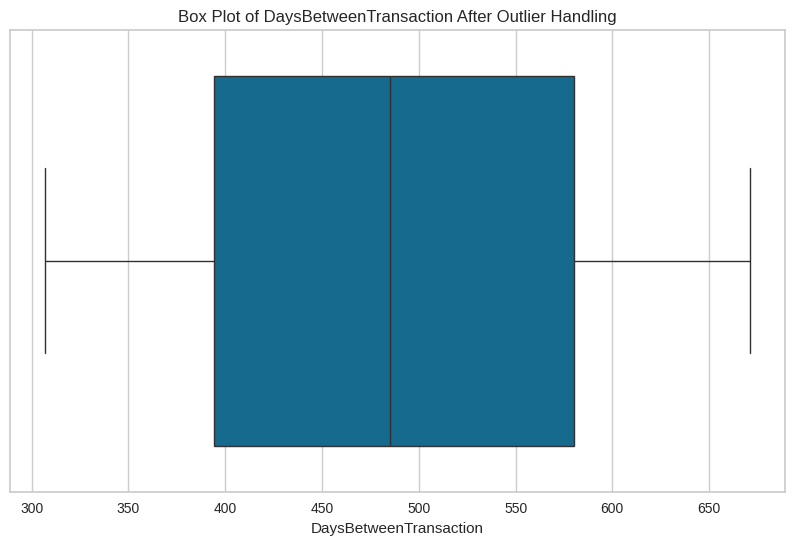

In [21]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[feature])
    plt.title(f'Box Plot of {feature} After Outlier Handling')
    plt.show()

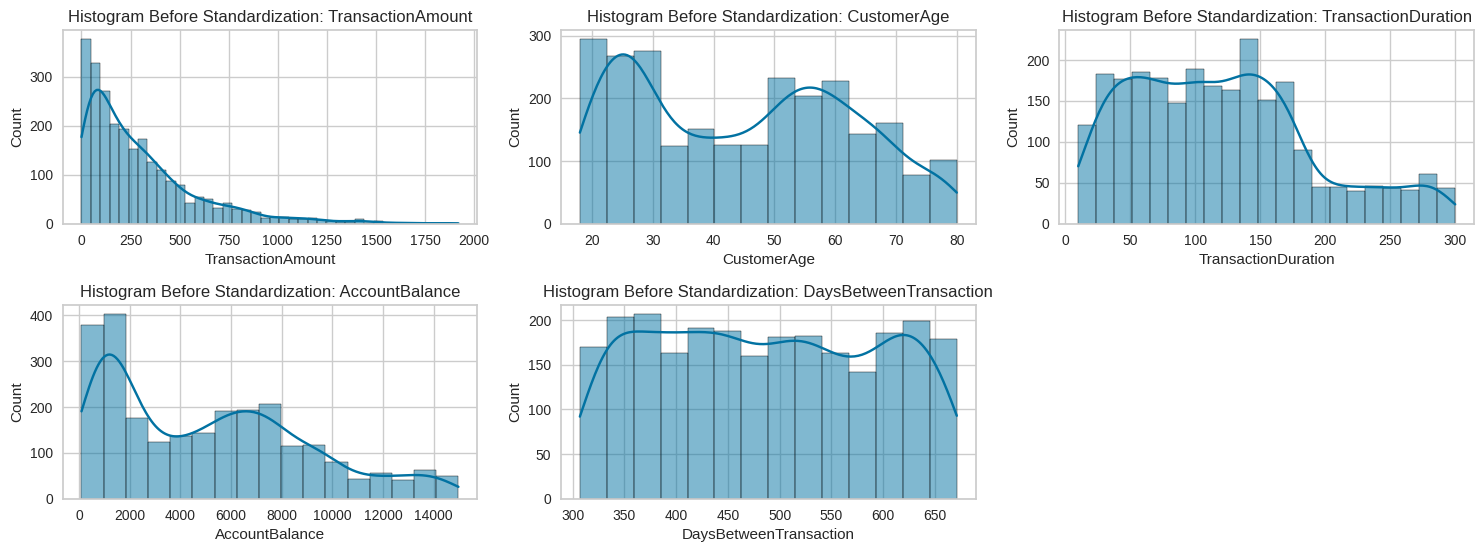

In [22]:
#  Show Histogram before Standardization
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_preprocessed[feature], kde=True)
    plt.title(f"Histogram Before Standardization: {feature}")
plt.tight_layout()
plt.show()

In [23]:
# Standardization Numerical Data
scaler = StandardScaler()
df_preprocessed[numeric_features] = scaler.fit_transform(df_preprocessed[numeric_features])

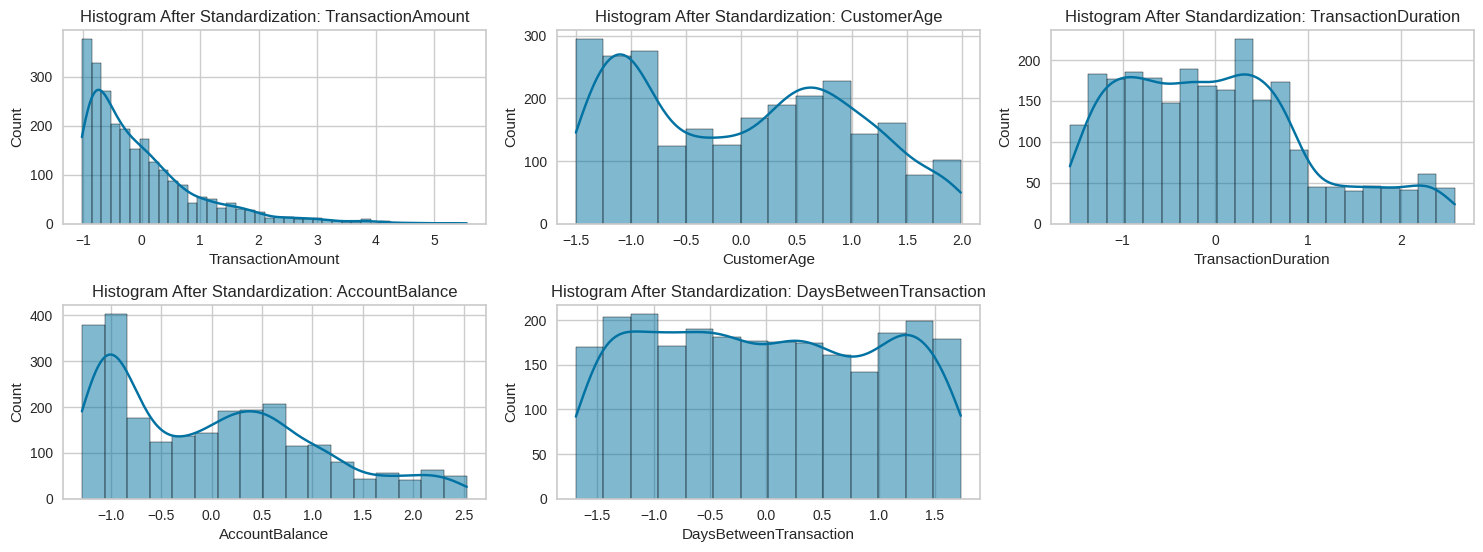

In [24]:
# Show Histogram After Standardization
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_preprocessed[feature], kde=True)
    plt.title(f"Histogram After Standardization: {feature}")
plt.tight_layout()
plt.show()

In [25]:
# Get all categorical features
categorical_features = df_preprocessed.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')


In [26]:
print("Data Before Label Encoding:")
print(df_preprocessed[categorical_features].head())

Data Before Label Encoding:
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student


In [27]:
# Label Encoding for Categorical Data
label_encoders = {}
df_lencoder = df_preprocessed.copy()

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df_preprocessed[col])


print(df_lencoder.head())


   TransactionAmount     TransactionDate  TransactionType  Location  Channel  \
0          -0.971275 2023-04-11 16:29:14                1        36        0   
1           0.269440 2023-06-27 16:44:19                1        15        0   
2          -0.586882 2023-07-10 18:16:08                1        23        2   
3          -0.387456 2023-05-05 16:32:11                1        33        2   
4          -0.973468 2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  AccountBalance  \
0     1.423718                   0            -0.552443       -0.000537   
1     1.311287                   0             0.305314        2.216472   
2    -1.443277                   3            -0.909842       -1.023534   
3    -1.049768                   3            -1.353017        0.885797   
4    -1.049768                   3             1.120184        0.593589   

  PreviousTransactionDate  DaysBetweenTransaction  
0     2024-11-04

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

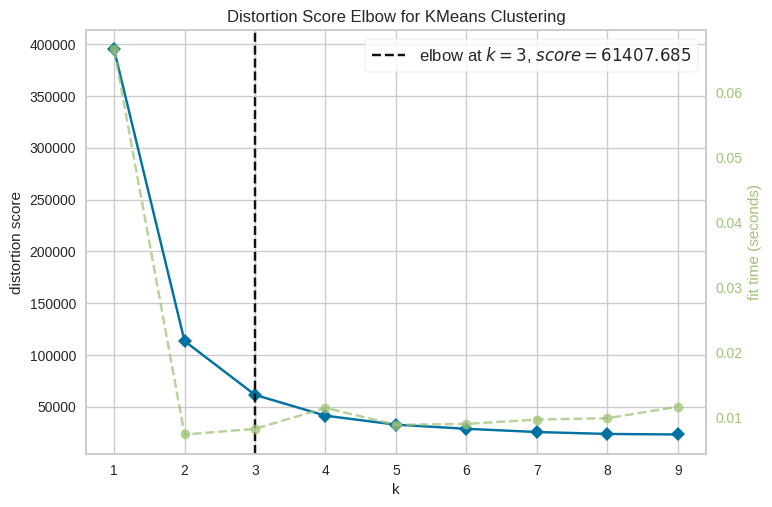

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Select features for clustering
select_features_k_means = df_lencoder[['TransactionAmount', 'AccountBalance', 'CustomerAge', 'CustomerOccupation', 'DaysBetweenTransaction', 'Channel', 'TransactionType', 'Location', 'TransactionDuration']]

# Initialize KMeans Model without params
kmeans = KMeans()

# Initialize Elbow Method to find optimal K
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer.fit(select_features_k_means)

# Show the result
visualizer.show()

In [29]:
# Initialize KMeans Model with optimal K
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(select_features_k_means)

# Get the cluster labels
cluster_labels = model_kmeans.labels_

# Get n cluster
k = 3

# Function to analyze characteristics of each cluster
def analyze_cluster(X, cluster_labels, k):
    print("Analysis of Cluster Characteristics:")
    for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]

        # Calculate the average value of each nominal features in the cluster
        mean_transaction_amount = cluster_data['TransactionAmount'].mean()
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_customer_age = cluster_data['CustomerAge'].mean()
        mean_days_between_transaction = cluster_data['DaysBetweenTransaction'].mean()

        # Calculate the mode of each categorical features in the cluster
        mode_channel = cluster_data['Channel'].mode().values[0]
        mode_customer_occupation = cluster_data['CustomerOccupation'].mode().values[0]


        # Print the average value of each feature in the cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Transaction Amount: {mean_transaction_amount}")
        print(f"Average Account Balance: {mean_account_balance}")
        print(f"Average Customer Age: {mean_customer_age}")
        print(f"Average Days Between Transaction: {mean_days_between_transaction}")
        print(f"Mode Channel: {mode_channel}")
        print(f"Mode Customer Occupation: {mode_customer_occupation}")


# Analyze the characteristics of each cluster
analyze_cluster(select_features_k_means, cluster_labels, k)

Analysis of Cluster Characteristics:

Cluster 1:
Average Transaction Amount: 0.020872609056587745
Average Account Balance: 0.006464093231016509
Average Customer Age: -0.02859850148684088
Average Days Between Transaction: -0.009700299872505145
Mode Channel: 1
Mode Customer Occupation: 3

Cluster 2:
Average Transaction Amount: -0.001337558076322205
Average Account Balance: 0.010033792511952298
Average Customer Age: 0.02582366845020713
Average Days Between Transaction: -0.01649603417045172
Mode Channel: 1
Mode Customer Occupation: 3

Cluster 3:
Average Transaction Amount: -0.021858185153424046
Average Account Balance: -0.015857245429103193
Average Customer Age: 0.009080955118146123
Average Days Between Transaction: 0.025047650410008584
Mode Channel: 1
Mode Customer Occupation: 1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [30]:
# Evaluate the model using Silhouette Score
silhouette_avg = silhouette_score(select_features_k_means, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4894259923162318


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Selected Features: Index(['AccountBalance', 'CustomerAge', 'Channel', 'TransactionType',
       'Location'],
      dtype='object')


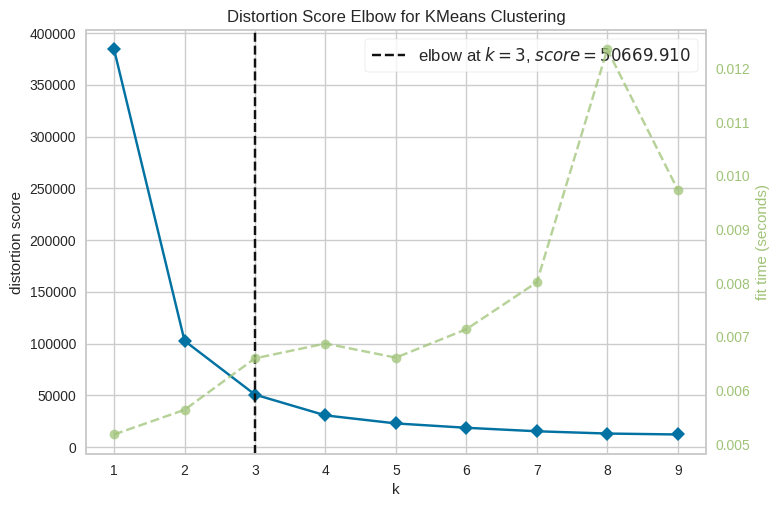

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Initialize the model for RFE
model_rfe = LogisticRegression(max_iter=500)
# Initialize RFE with the model and number of features to selec
rfe_selector = RFE(model_rfe, n_features_to_select=5)

# Fit RFE
rfe_selector.fit(select_features_k_means, cluster_labels)

# Get the selected features
selected_features_from_rfe = select_features_k_means.columns[rfe_selector.get_support(indices=True)]
print("Selected Features:", selected_features_from_rfe)

# Elbow Method to find optimal K after Feature Selection
visualizer_rfe = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer_rfe.fit(select_features_k_means[selected_features_from_rfe])

# Show the result
visualizer_rfe.show()


In [32]:
# Copy df based on selected features from rfe
k_means_rfe = select_features_k_means[selected_features_from_rfe]

# Rebuild the model with selected features
model_kmeans_rfe = KMeans(n_clusters=3, random_state=0)
model_kmeans_rfe.fit(k_means_rfe)

# Get the cluster labels
cluster_labels_rfe = model_kmeans_rfe.labels_

# Evaluate the model using Silhouette Score
silhouette_avg_rfe = silhouette_score(select_features_k_means[selected_features_from_rfe], cluster_labels_rfe)

print(f"Silhouette Score before Feature Selection: {silhouette_avg}")
print(f"Silhouette Score after Feature Selection: {silhouette_avg_rfe}")

Silhouette Score before Feature Selection: 0.4894259923162318
Silhouette Score after Feature Selection: 0.5359736779725359


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

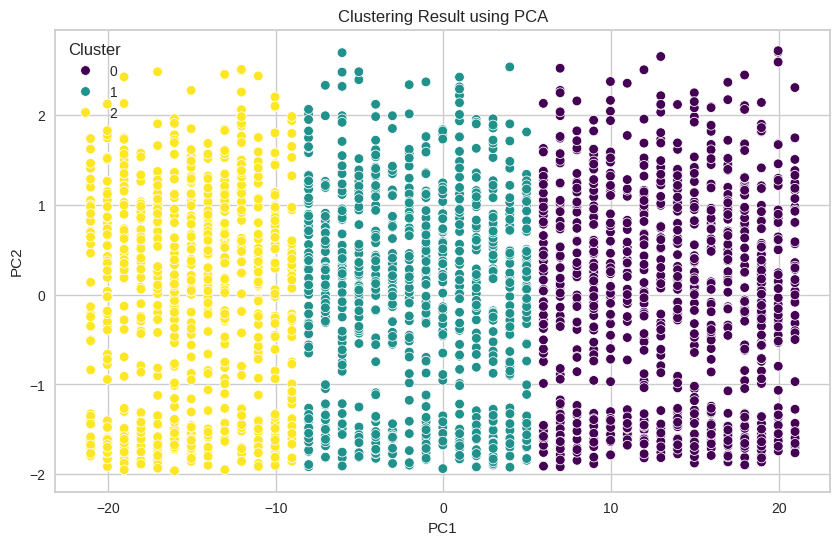

In [33]:
# Visualize the clustering result using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(k_means_rfe)
df_viz = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
df_viz["Cluster"] = cluster_labels_rfe

# Visualize the clustering result using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x="PC1", y="PC2", hue="Cluster", palette="viridis")
plt.title("Clustering Result using PCA")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [35]:
# Add cluster labels to the original dataframe
df_normalized = k_means_rfe.copy()
df_normalized['Cluster'] = cluster_labels_rfe

print("Data Before Inverse Transform:")
print(df_normalized.head())

# Inverse Transform for Categorical Data
df_normalized['Channel'] = label_encoders['Channel'].inverse_transform(df_normalized['Channel'])
df_normalized['TransactionType'] = label_encoders['TransactionType'].inverse_transform(df_normalized['TransactionType'])
df_normalized['Location'] = label_encoders['Location'].inverse_transform(df_normalized['Location'])

print("\nData After Inverse Transform:")
print(df_normalized.head())


Data Before Inverse Transform:
   AccountBalance  CustomerAge  Channel  TransactionType  Location  Cluster
0       -0.000537     1.423718        0                1        36        0
1        2.216472     1.311287        0                1        15        1
2       -1.023534    -1.443277        2                1        23        1
3        0.885797    -1.049768        2                1        33        0
4        0.593589    -1.049768        2                0         1        2

Data After Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0       -0.000537     1.423718     ATM           Debit  San Diego        0
1        2.216472     1.311287     ATM           Debit    Houston        1
2       -1.023534    -1.443277  Online           Debit       Mesa        1
3        0.885797    -1.049768  Online           Debit    Raleigh        0
4        0.593589    -1.049768  Online          Credit    Atlanta        2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
# Show data before inverse transform
print("Data Before Inverse Transform:")
print(df_normalized.head())


# Inverse Transform for Numerical Data in df_lencoder
df_lencoder[numeric_features] = scaler.inverse_transform(df_lencoder[numeric_features])

# Change value in df_normalized with inverse transform value from selected features
num_features_selected_rfe = [ 'AccountBalance', 'CustomerAge']
df_normalized[num_features_selected_rfe] = df_lencoder[num_features_selected_rfe]


# Show data after inverse transform
print("\nData After Inverse Transform:")
print(df_normalized.head())

Data Before Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0       -0.000537     1.423718     ATM           Debit  San Diego        0
1        2.216472     1.311287     ATM           Debit    Houston        1
2       -1.023534    -1.443277  Online           Debit       Mesa        1
3        0.885797    -1.049768  Online           Debit    Raleigh        0
4        0.593589    -1.049768  Online          Credit    Atlanta        2

Data After Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0         5112.21         70.0     ATM           Debit  San Diego        0
1        13758.91         68.0     ATM           Debit    Houston        1
2         1122.35         19.0  Online           Debit       Mesa        1
3         8569.06         26.0  Online           Debit    Raleigh        0
4         7429.40         26.0  Online          Credit    Atlanta        2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Function to analyze characteristics of each cluster
def analyze_character_cluster(X, cluster_labels, k):
      print("Analysis of Cluster Characteristics:")
      for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]

        # Calculate the average value of each nominal features in the cluster
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_customer_age = cluster_data['CustomerAge'].mean()

        # Calculate the mode of each categorical features in the cluster
        mode_channel = cluster_data['Channel'].mode().values[0]
        mode_transaction_type = cluster_data['TransactionType'].mode().values[0]
        mode_location = cluster_data['Location'].mode().values[0]

        # Print the average value of each feature in the cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Account Balance: {mean_account_balance}")
        print(f"Average Customer Age: {mean_customer_age}")
        print(f"Mode Channel: {mode_channel}")
        print(f"Mode Transaction Type: {mode_transaction_type}")
        print(f"Mode Location: {mode_location}")

analyze_character_cluster(df_normalized, cluster_labels_rfe, k)

# Calculate statistic description for each cluster
cluster_summary = df_normalized.groupby("Cluster")[num_features_selected_rfe].agg(["mean", "median", "std", "min", "max"])
print("\nStatistic Description for Each Cluster:")
print(cluster_summary)

Analysis of Cluster Characteristics:

Cluster 1:
Average Account Balance: 5139.514002145924
Average Customer Age: 44.16523605150215
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Oklahoma City

Cluster 2:
Average Account Balance: 5052.457076923077
Average Customer Age: 44.83550295857988
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Fort Worth

Cluster 3:
Average Account Balance: 5153.436421768707
Average Customer Age: 45.13333333333333
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Charlotte

Statistic Description for Each Cluster:
        AccountBalance                                          CustomerAge  \
                  mean    median          std     min       max        mean   
Cluster                                                                       
0          5139.514002  4641.615  3948.101975  102.20  14977.99   44.165236   
1          5052.457077  4574.430  3904.394723  101.25  14942.78   44.835503   
2          5

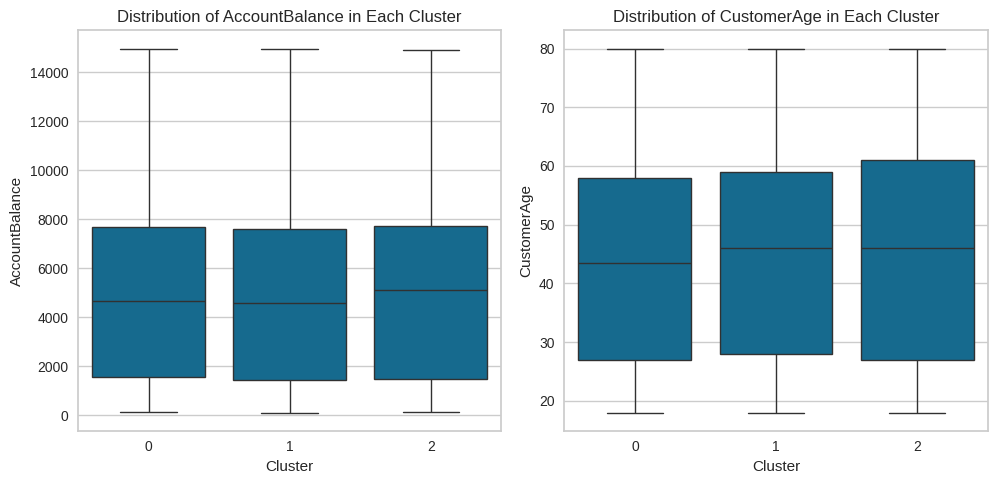

In [38]:
# Visualize numerical features with high correlation in each cluster
selected_numerical_features = ['AccountBalance', 'CustomerAge']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_normalized["Cluster"], y=df_normalized[feature])
    plt.title(f'Distribution of {feature} in Each Cluster')
plt.tight_layout()
plt.show()

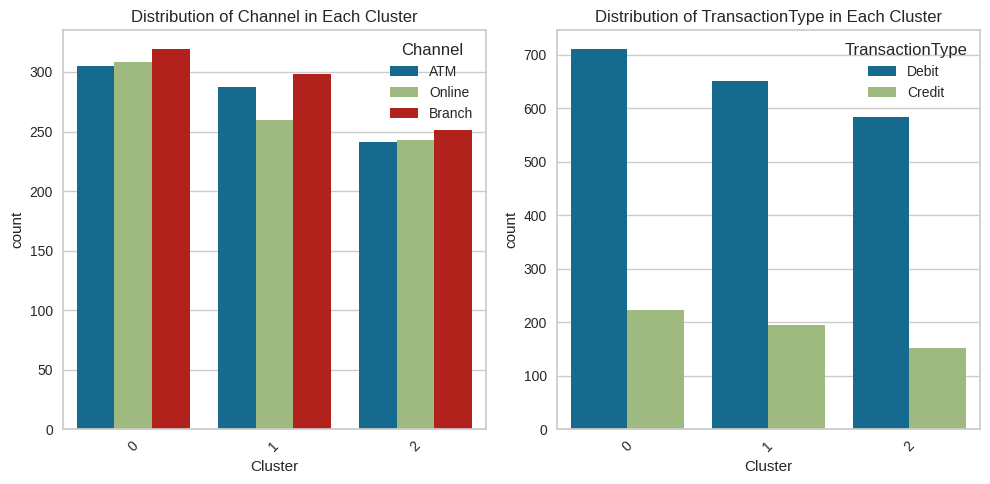

In [39]:
# Visualize categorical features in each cluster
selected_categorical_features = ['Channel', 'TransactionType']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df_normalized["Cluster"], hue=df_normalized[feature])
    plt.title(f'Distribution of {feature} in Each Cluster')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analysis Characteristic Cluster from KMeans Model
Berikut adalah analisis karakteristik dari masing-masing klaster yang diperoleh dari model KMeans.

Cluster 1:
Average Account Balance: 5139.514002145924
Average Customer Age: 44.16523605150215
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Oklahoma City

Cluster 2:
Average Account Balance: 5052.457076923077
Average Customer Age: 44.83550295857988
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Fort Worth

Cluster 3:
Average Account Balance: 5153.436421768707
Average Customer Age: 45.13333333333333
Mode Channel: Branch
Mode Transaction Type: Debit
Mode Location: Charlotte

## Cluster 1:
- **Average Account Balance:** 5139.514002145924
- **Average Customer Age:** 44.16523605150215
- **Mode Channel:** Branch
- **Mode Transaction Type:** Debit
- **Mode Location:** Oklahoma City
- **Analysis**:
Pelanggan pada Klaster 1 memiliki rata-rata saldo akun sebesar 5139 dengan rata-rata usia 44 tahun. Oklahoma City merupakan lokasi terbanyak di mana pelanggan dari klaster ini melakukan transaksi. Mereka cenderung menggunakan *Branch* sebagai saluran transaksi dan lebih memilih *Debit* sebagai jenis transaksinya.

## Cluster 2:
- **Average Account Balance:** 5052.457076923077
- **Average Customer Age:** 44.83550295857988
- **Mode Channel:** Branch
- **Mode Transaction Type:** Debit
- **Mode Location:** Fort Worth
- **Analysis**:
Pelanggan pada Klaster 2 mirip dengan Klaster 1, namun mereka memiliki rata-rata saldo akun yang lebih rendah, yaitu 5052. Fort Worth adalah lokasi terbanyak di mana pelanggan dari klaster ini melakukan transaksi. Untuk saluran transaksi dan jenis transaksi, mereka memiliki preferensi yang sama dengan Klaster 1.

## Cluster 3:
- **Average Account Balance:** 5153.436421768707
- **Average Customer Age:** 45.13333333333333
- **Mode Channel:** Branch
- **Mode Transaction Type:** Debit
- **Mode Location:** Charlotte
- **Analysis**:
Klaster 3 memiliki rata-rata saldo akun tertinggi, yaitu 5153. Charlotte adalah lokasi terbanyak di mana pelanggan dari klaster ini melakukan transaksi. Untuk saluran transaksi dan jenis transaksi, preferensinya sama seperti pada Klaster 1 dan 2. Namun, pada klaster ini, pelanggan memiliki rata-rata usia tertinggi, yaitu 45,13 tahun.

# Analisis Berdasarkan Deskripsi Statistik
Deskripsi statistik untuk setiap klaster menunjukkan informasi berikut:

## Saldo Akun:
- Rata-rata saldo akun di semua klaster relatif mirip, berkisar antara 5052 hingga 5153.
- Distribusi saldo akun di setiap klaster cukup bervariasi, dengan nilai minimum sekitar 100 dan maksimum sekitar 14900.
- *Standard deviation* (simpangan baku) saldo akun cukup tinggi (sekitar 3800 - 3900), yang menunjukkan adanya variasi yang besar dalam nilai saldo akun.

## Usia Pelanggan:
- Rata-rata usia pelanggan di semua klaster relatif mirip, berkisar antara 44 hingga 45 tahun.
- Distribusi usia pelanggan di setiap klaster cukup bervariasi, dengan nilai minimum 18 dan maksimum 80. Hal ini menunjukkan bahwa pelanggan berasal dari berbagai generasi.

# Kesimpulan dan Wawasan
1. Semua pelanggan di setiap klaster lebih memilih untuk menggunakan *Branch* sebagai saluran transaksi dan *Debit* sebagai jenis transaksi mereka.
2. Rata-rata saldo akun dan usia pelanggan di semua klaster relatif mirip.
3. Fitur yang paling berpengaruh adalah Lokasi, di mana setiap klaster memiliki lokasi yang berbeda sebagai lokasi terbanyak di mana pelanggan melakukan transaksi.
4. *Debit* masih menjadi jenis transaksi yang paling sering digunakan. Saya menyarankan perusahaan untuk memberikan lebih banyak promosi untuk jenis transaksi *Credit*, mungkin dengan memberikan cashback atau diskon.
5. *Branch* adalah saluran yang paling banyak digunakan oleh pelanggan. Saya menyarankan perusahaan untuk meningkatkan fungsionalitas saluran online/ATM untuk menarik lebih banyak pelanggan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [41]:
# Export data to CSV
df_normalized.to_csv('bank_transactions_data_clustered.csv', index=False)